In [ ]:
!pip install -q tensorflow opencv-python matplotlib pandas


In [ ]:
import cv2   # image processing
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print('The shape of the training inputs:', X_train.shape)
print('The shape of the training labels:', y_train.shape)
print('The shape of the testing inputs:', X_test.shape)
print('The shape of the testing labels:', y_test.shape)


The shape of the training inputs: (60000, 28, 28)
The shape of the training labels: (60000,)
The shape of the testing inputs: (10000, 28, 28)
The shape of the testing labels: (10000,)


In [ ]:
X_train


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

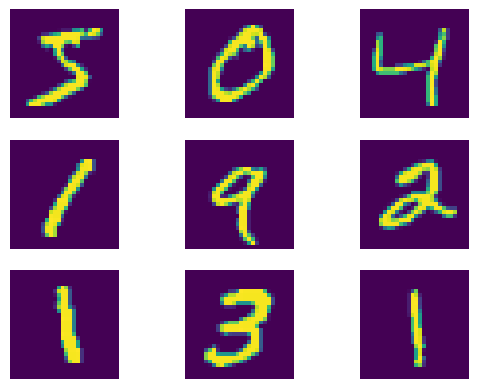

In [ ]:
fig, axs = plt.subplots(3, 3)
cnt = 0
for i in range(3):
    for j in range(3):
        axs[i, j].imshow(X_train[cnt])
        axs[i, j].axis('off')
        cnt += 1
plt.show()


In [ ]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

print(f"CNN Input shape: {X_train_cnn.shape}")
print(f"Original shape for MLP: {X_train.shape}")


CNN Input shape: (60000, 28, 28, 1)
Original shape for MLP: (60000, 28, 28)


In [ ]:
def build_cnn(activation='relu', fc_units=128, use_bn=False, dropout_rate=0.25):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation=activation, input_shape=(28, 28, 1)),
        tf.keras.layers.Conv2D(64, (3, 3), activation=activation),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(fc_units, activation=activation),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model


def build_mlp(activation='relu', hidden_units=[512, 256, 128], use_bn=True, dropout_rate=0.0):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

    for units in hidden_units:
        model.add(tf.keras.layers.Dense(units))
        if use_bn:
            model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Activation(activation))
        if dropout_rate > 0:
            model.add(tf.keras.layers.Dropout(dropout_rate))

    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    return model


def train_model(model, optimizer_name, X_train, y_train, X_test, y_test, epochs, batch_size=128):
    if optimizer_name == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
    elif optimizer_name == 'sgd_momentum':
        optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
    elif optimizer_name == 'adam':
        optimizer = tf.keras.optimizers.Adam()
    else:
        raise ValueError("Unknown optimizer")

    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=epochs,
        batch_size=batch_size,
        verbose=0
    )
    return history


In [ ]:
import pandas as pd

task1_results = []
task1_histories = {}

activations = ['sigmoid', 'tanh', 'relu']

for activation in activations:
    model = build_cnn(activation=activation)
    history = train_model(
        model, 'sgd',
        X_train_cnn, y_train,
        X_test_cnn, y_test,
        epochs=10
    )

    final_acc = history.history['val_accuracy'][-1]
    task1_results.append({
        'Activation': activation,
        'Final Accuracy': f'{final_acc:.4f}'
    })
    task1_histories[activation] = history

pd.DataFrame(task1_results)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


,Activation,Final Accuracy
0,sigmoid,0.1135
1,tanh,0.9557
2,relu,0.9594


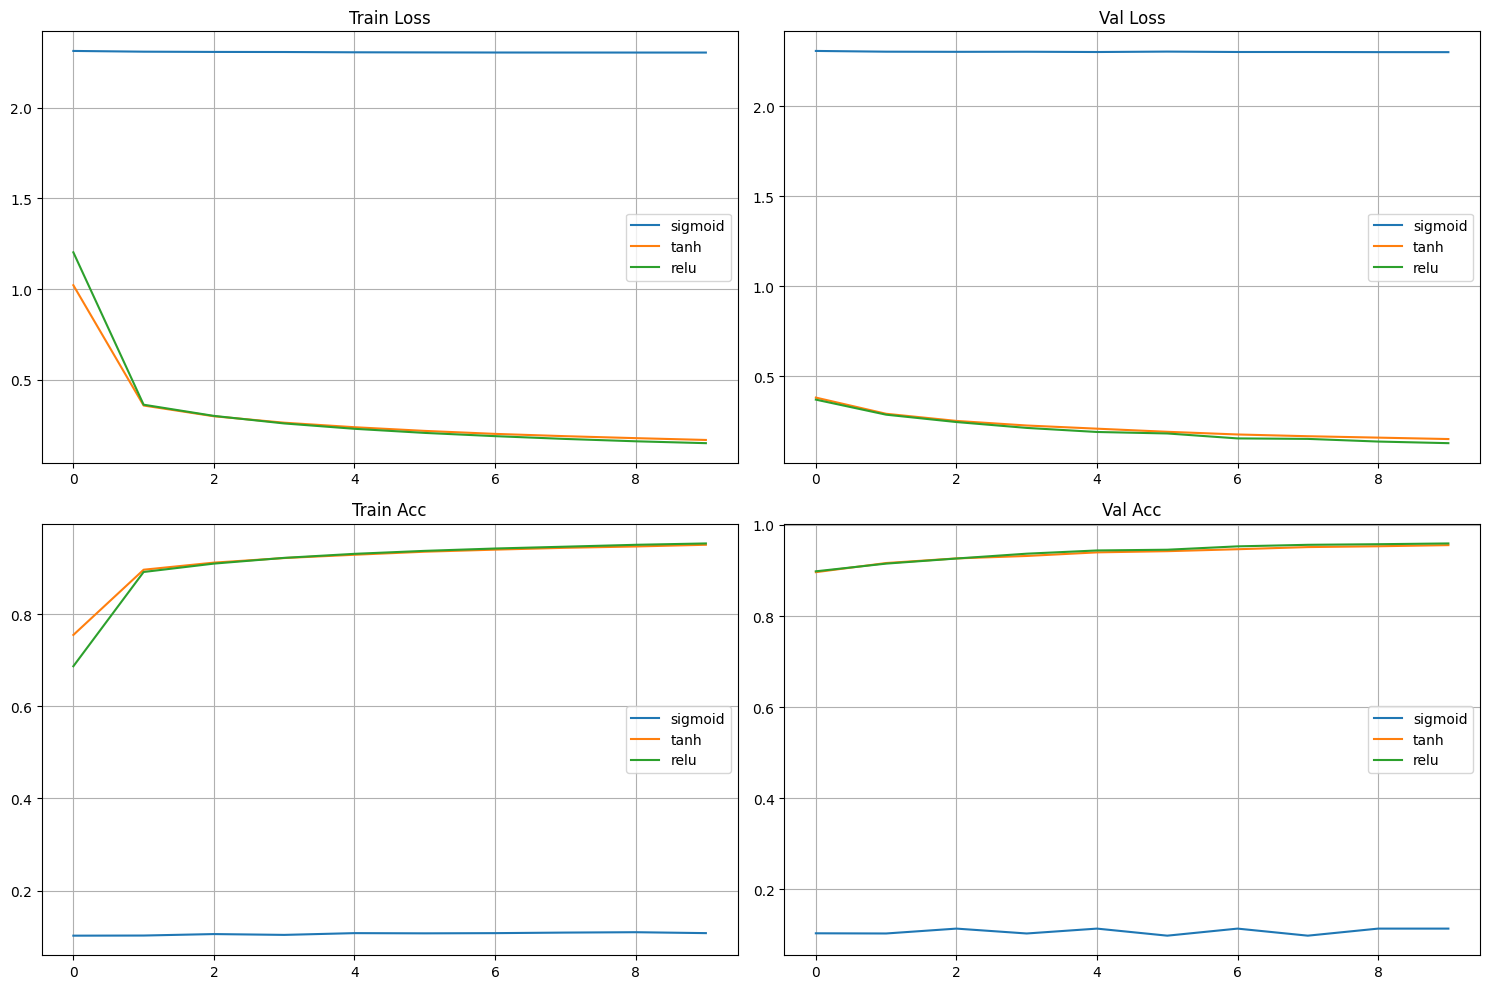

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for act in activations:
    axes[0,0].plot(task1_histories[act].history['loss'], label=act)
    axes[0,1].plot(task1_histories[act].history['val_loss'], label=act)
    axes[1,0].plot(task1_histories[act].history['accuracy'], label=act)
    axes[1,1].plot(task1_histories[act].history['val_accuracy'], label=act)

titles = ['Train Loss','Val Loss','Train Acc','Val Acc']
for ax, title in zip(axes.flat, titles):
    ax.set_title(title)
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


In [ ]:

# Task 2: Optimizer Experiments
task2_results = []
task2_histories = {}

optimizers = [('sgd', 'SGD'), ('sgd_momentum', 'SGD+Momentum'), ('adam', 'Adam')]

for opt_key, opt_name in optimizers:
    print(f"\n{'='*60}")
    print(f"Training CNN with {opt_name} optimizer...")
    print('='*60)

    # Build and train model with ReLU (best from Task 1)
    model = build_cnn(activation='relu', fc_units=128)
    history = train_model(
        model, opt_key,
        X_train_cnn, y_train,
        X_test_cnn, y_test,
        epochs=10
    )

    # Store results
    final_acc = history.history['val_accuracy'][-1]
    task2_results.append({
        'Experiment': f'CNN-{opt_name}',
        'Activation': 'ReLU',
        'Optimizer': opt_name,
        'Epochs': 10,
        'Final Accuracy': f'{final_acc:.4f}'
    })
    task2_histories[opt_name] = history

    print(f"Final Test Accuracy: {final_acc:.4f}")

# Create results table
task2_df = pd.DataFrame(task2_results)
print("\n" + "="*60)
print("TASK 2 RESULTS: Optimizer Comparison")
print("="*60)
print(task2_df.to_string(index=False))


Training CNN with SGD optimizer...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Final Test Accuracy: 0.9612

Training CNN with SGD+Momentum optimizer...
Final Test Accuracy: 0.9862

Training CNN with Adam optimizer...
Final Test Accuracy: 0.9896

TASK 2 RESULTS: Optimizer Comparison
      Experiment Activation    Optimizer  Epochs Final Accuracy
         CNN-SGD       ReLU          SGD      10         0.9612
CNN-SGD+Momentum       ReLU SGD+Momentum      10         0.9862
        CNN-Adam       ReLU         Adam      10         0.9896


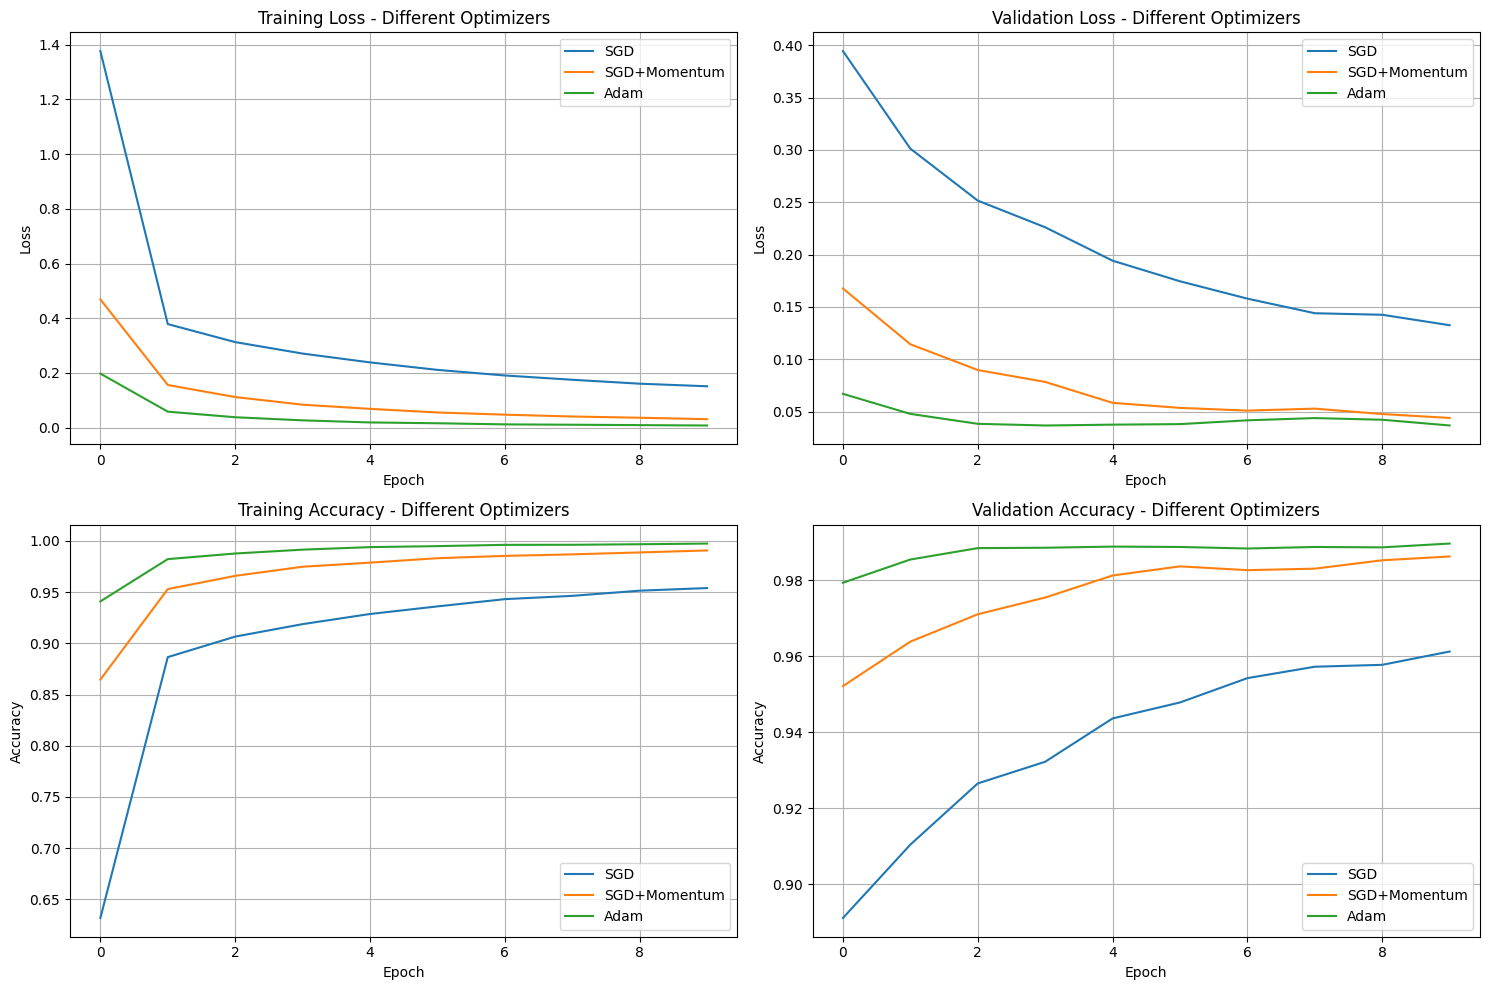

In [ ]:
# Plot Task 2 Results: Loss and Accuracy Curves
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Training Loss
for _, opt_name in optimizers:
    axes[0, 0].plot(task2_histories[opt_name].history['loss'], label=opt_name)
axes[0, 0].set_title('Training Loss - Different Optimizers')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Validation Loss
for _, opt_name in optimizers:
    axes[0, 1].plot(task2_histories[opt_name].history['val_loss'], label=opt_name)
axes[0, 1].set_title('Validation Loss - Different Optimizers')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Training Accuracy
for _, opt_name in optimizers:
    axes[1, 0].plot(task2_histories[opt_name].history['accuracy'], label=opt_name)
axes[1, 0].set_title('Training Accuracy - Different Optimizers')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Validation Accuracy
for _, opt_name in optimizers:
    axes[1, 1].plot(task2_histories[opt_name].history['val_accuracy'], label=opt_name)
axes[1, 1].set_title('Validation Accuracy - Different Optimizers')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].legend()
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Task 3: BN and Dropout Experiments
task3_results = []
task3_histories = {}

configs = [
    ('No BN, No Dropout', False, 0.0),
    ('No BN, Dropout=0.1', False, 0.1),
    ('With BN, Dropout=0.25', True, 0.25)
]

for config_name, use_bn, dropout in configs:
    print(f"\n{'='*60}")
    print(f"Training MLP: {config_name}...")
    print('='*60)

    # Build and train MLP model
    model = build_mlp(
        activation='relu',
        hidden_units=[256, 128],
        use_bn=use_bn,
        dropout_rate=dropout
    )
    history = train_model(
        model, 'adam',
        X_train, y_train,
        X_test, y_test,
        epochs=15
    )

    # Store results
    final_acc = history.history['val_accuracy'][-1]
    task3_results.append({
        'Configuration': config_name,
        'Batch Normalization': 'Yes' if use_bn else 'No',
        'Dropout Rate': dropout,
        'Epochs': 15,
        'Final Accuracy': f'{final_acc:.4f}'
    })
    task3_histories[config_name] = history

    print(f"Final Test Accuracy: {final_acc:.4f}")

# Create results table
task3_df = pd.DataFrame(task3_results)
print("\n" + "="*60)
print("TASK 3 RESULTS: BN and Dropout Impact")
print("="*60)
print(task3_df.to_string(index=False))


Training MLP: No BN, No Dropout...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Final Test Accuracy: 0.9758

Training MLP: No BN, Dropout=0.1...
Final Test Accuracy: 0.9786

Training MLP: With BN, Dropout=0.25...
Final Test Accuracy: 0.9799

TASK 3 RESULTS: BN and Dropout Impact
        Configuration Batch Normalization  Dropout Rate  Epochs Final Accuracy
    No BN, No Dropout                  No          0.00      15         0.9758
   No BN, Dropout=0.1                  No          0.10      15         0.9786
With BN, Dropout=0.25                 Yes          0.25      15         0.9799


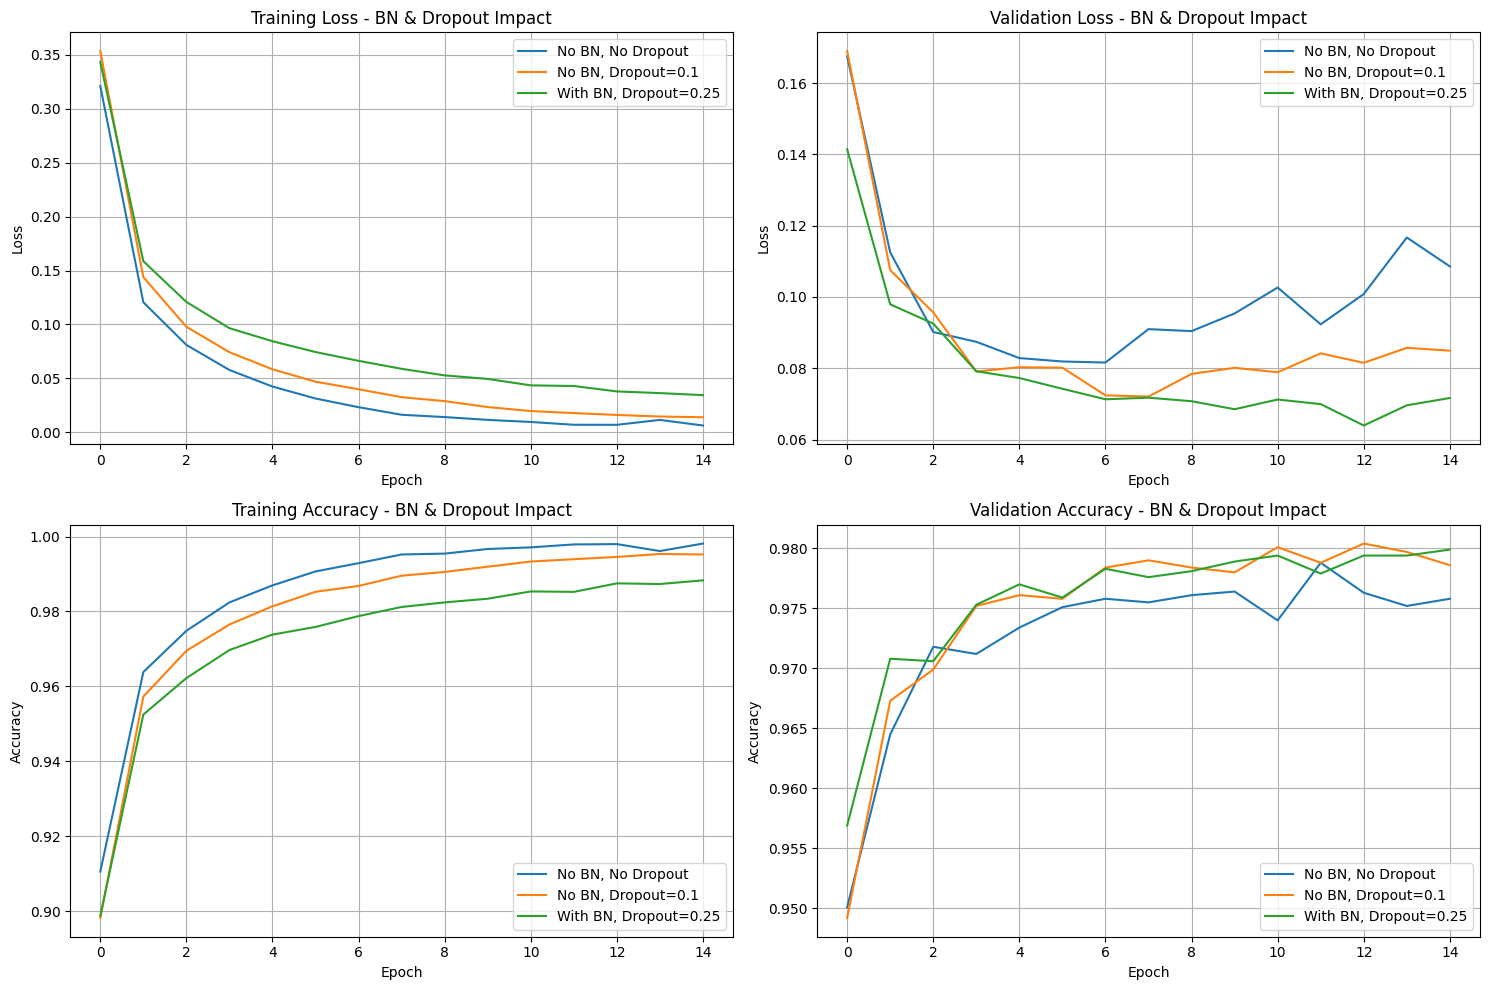

In [ ]:
# Plot Task 3 Results
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Training Loss
for config_name, _, _ in configs:
    axes[0, 0].plot(task3_histories[config_name].history['loss'], label=config_name)
axes[0, 0].set_title('Training Loss - BN & Dropout Impact')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Validation Loss
for config_name, _, _ in configs:
    axes[0, 1].plot(task3_histories[config_name].history['val_loss'], label=config_name)
axes[0, 1].set_title('Validation Loss - BN & Dropout Impact')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Training Accuracy
for config_name, _, _ in configs:
    axes[1, 0].plot(task3_histories[config_name].history['accuracy'], label=config_name)
axes[1, 0].set_title('Training Accuracy - BN & Dropout Impact')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Validation Accuracy
for config_name, _, _ in configs:
    axes[1, 1].plot(task3_histories[config_name].history['val_accuracy'], label=config_name)
axes[1, 1].set_title('Validation Accuracy - BN & Dropout Impact')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].legend()
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Required Model Experiments
required_results = []
required_histories = {}

# Model 1: CNN-1 with 128 FC layer, Adam optimizer, 10 epochs
print(f"\n{'='*60}")
print("Training CNN-1: FC=128, Optimizer=Adam, Epochs=10")
print('='*60)
model_cnn1 = build_cnn(activation='relu', fc_units=128, use_bn=False, dropout_rate=0.25)
history_cnn1 = train_model(model_cnn1, 'adam', X_train_cnn, y_train, X_test_cnn, y_test, epochs=10)
final_acc_cnn1 = history_cnn1.history['val_accuracy'][-1]
required_results.append({
    'Model': 'CNN-1',
    'FC Layer': '128',
    'Optimizer': 'Adam',
    'Epochs': 10,
    'Accuracy': f'{final_acc_cnn1:.4f}'
})
required_histories['CNN-1'] = history_cnn1
print(f"Final Test Accuracy: {final_acc_cnn1:.4f}")

# Model 2: MLP-1 with 512-256-128 layers, SGD optimizer, 20 epochs
print(f"\n{'='*60}")
print("Training MLP-1: Layers=512-256-128, Optimizer=SGD, Epochs=20")
print('='*60)
model_mlp1 = build_mlp(activation='relu', hidden_units=[512, 256, 128], use_bn=True, dropout_rate=0.0)
history_mlp1 = train_model(model_mlp1, 'sgd', X_train, y_train, X_test, y_test, epochs=20)
final_acc_mlp1 = history_mlp1.history['val_accuracy'][-1]
required_results.append({
    'Model': 'MLP-1',
    'FC Layer': '512-256-128',
    'Optimizer': 'SGD',
    'Epochs': 20,
    'Accuracy': f'{final_acc_mlp1:.4f}'
})
required_histories['MLP-1'] = history_mlp1
print(f"Final Test Accuracy: {final_acc_mlp1:.4f}")

# Model 3: MLP-2 with 256 layer, Adam optimizer, 15 epochs
print(f"\n{'='*60}")
print("Training MLP-2: Layers=256, Optimizer=Adam, Epochs=15")
print('='*60)
model_mlp2 = build_mlp(activation='relu', hidden_units=[256], use_bn=True, dropout_rate=0.0)
history_mlp2 = train_model(model_mlp2, 'adam', X_train, y_train, X_test, y_test, epochs=15)
final_acc_mlp2 = history_mlp2.history['val_accuracy'][-1]
required_results.append({
    'Model': 'MLP-2',
    'FC Layer': '256',
    'Optimizer': 'Adam',
    'Epochs': 15,
    'Accuracy': f'{final_acc_mlp2:.4f}'
})
required_histories['MLP-2'] = history_mlp2
print(f"Final Test Accuracy: {final_acc_mlp2:.4f}")

# Create results table
required_df = pd.DataFrame(required_results)
print("\n" + "="*60)
print("TABLE 1: REQUIRED MODEL CONFIGURATIONS")
print("="*60)
print(required_df.to_string(index=False))


Training CNN-1: FC=128, Optimizer=Adam, Epochs=10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Final Test Accuracy: 0.9880

Training MLP-1: Layers=512-256-128, Optimizer=SGD, Epochs=20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Final Test Accuracy: 0.9735

Training MLP-2: Layers=256, Optimizer=Adam, Epochs=15
Final Test Accuracy: 0.9737

TABLE 1: REQUIRED MODEL CONFIGURATIONS
Model    FC Layer Optimizer  Epochs Accuracy
CNN-1         128      Adam      10   0.9880
MLP-1 512-256-128       SGD      20   0.9735
MLP-2         256      Adam      15   0.9737


In [ ]:
# TABLE 1: Required Model Configurations
print("="*70)
print("TABLE 1: REQUIRED MODEL CONFIGURATIONS")
print("="*70)
print(required_df.to_string(index=False))
print("="*70)

TABLE 1: REQUIRED MODEL CONFIGURATIONS
Model    FC Layer Optimizer  Epochs Accuracy
CNN-1         128      Adam      10   0.9880
MLP-1 512-256-128       SGD      20   0.9735
MLP-2         256      Adam      15   0.9737


In [ ]:
# TABLE 2: Comprehensive Experiment Comparison (Activation + Optimizer)
# Combine Task 1 and Task 2 results
combined_results = []

# Add Task 1 results (Activation comparison with SGD)
for result in task1_results:
    combined_results.append({
        'Experiment': len(combined_results) + 1,
        'Activation': result['Activation'].capitalize(),
        'Optimizer': result['Optimizer'],
        'Epochs': result['Epochs'],
        'Final Accuracy': result['Final Accuracy']
    })

# Add Task 2 results (Optimizer comparison with ReLU)
for result in task2_results:
    combined_results.append({
        'Experiment': len(combined_results) + 1,
        'Activation': result['Activation'],
        'Optimizer': result['Optimizer'],
        'Epochs': result['Epochs'],
        'Final Accuracy': result['Final Accuracy']
    })

combined_df = pd.DataFrame(combined_results)
print("\n" + "="*70)
print("TABLE 2: COMPREHENSIVE EXPERIMENT COMPARISON")
print("="*70)
print(combined_df.to_string(index=False))
print("="*70)

KeyError: 'Optimizer'

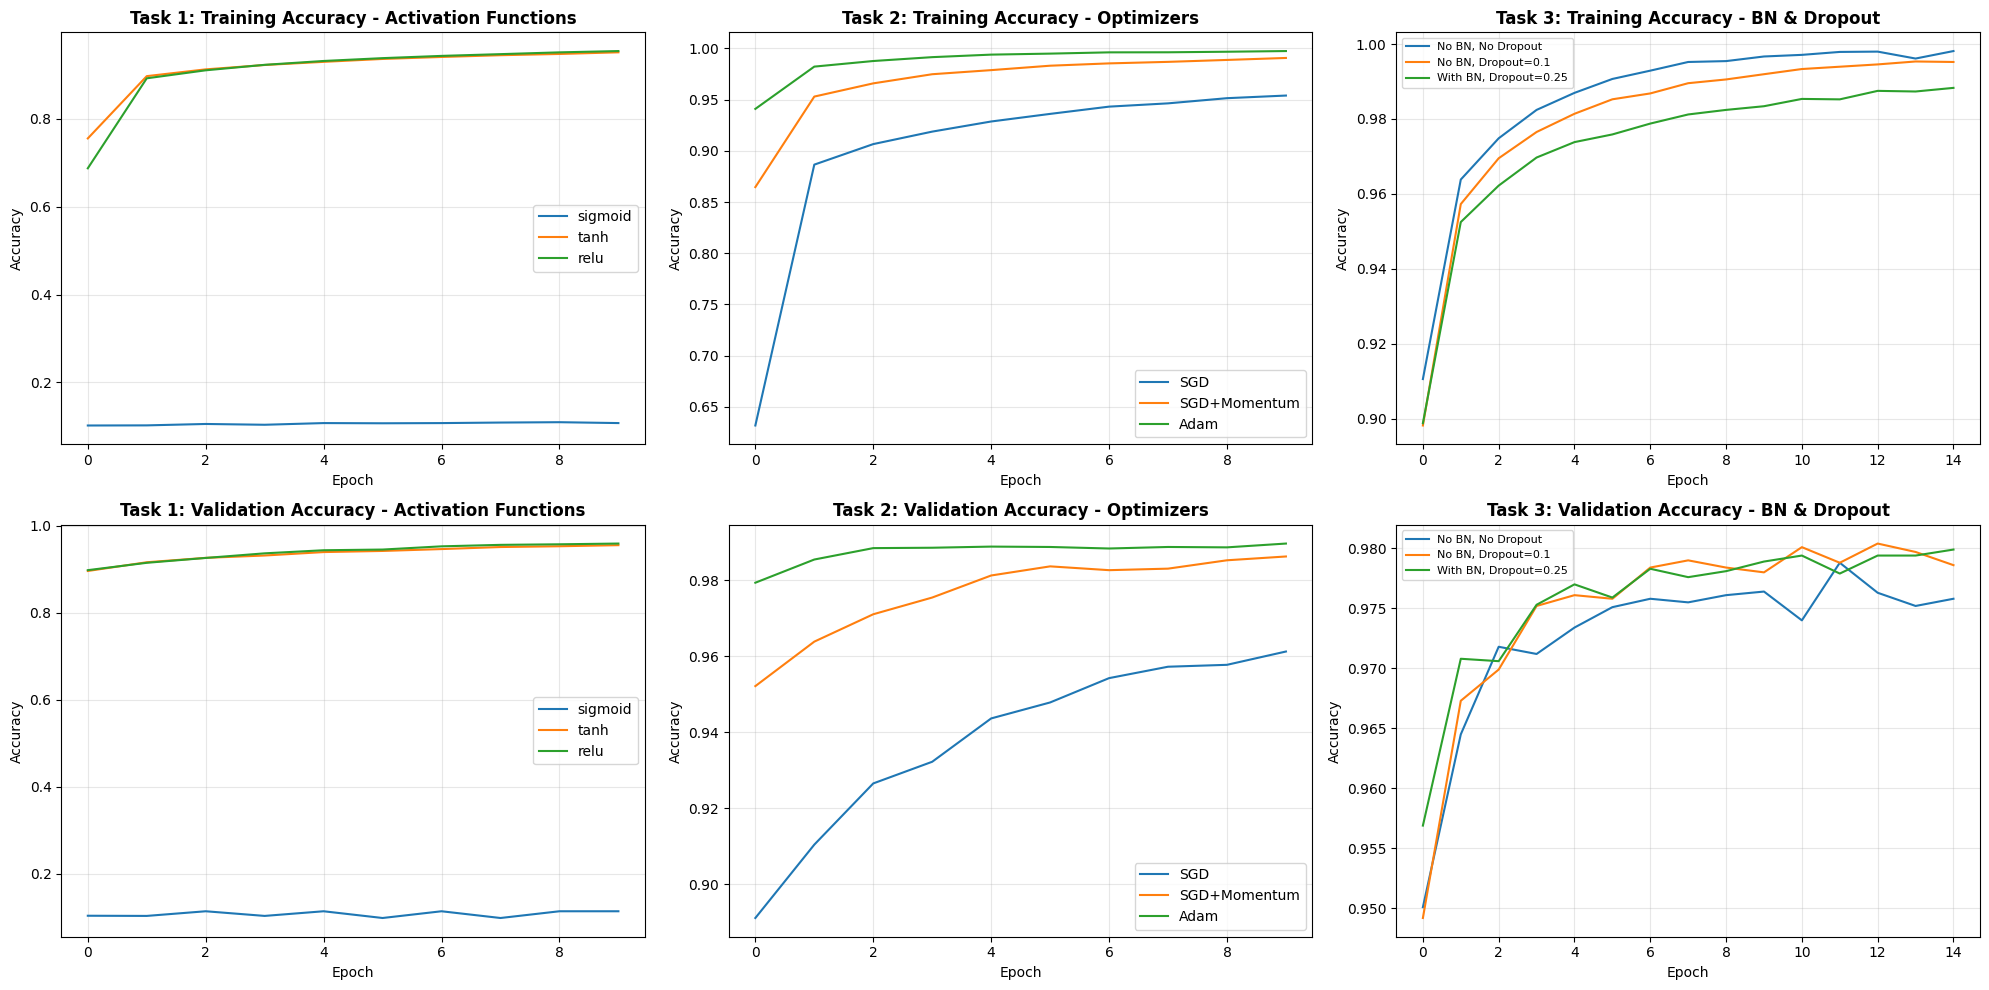

In [ ]:
# Comprehensive plot comparing all experiments
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Plot 1: Task 1 - Activation Functions (Training Accuracy)
for activation in activations:
    axes[0, 0].plot(task1_histories[activation].history['accuracy'], label=activation)
axes[0, 0].set_title('Task 1: Training Accuracy - Activation Functions', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Task 1 - Activation Functions (Validation Accuracy)
for activation in activations:
    axes[1, 0].plot(task1_histories[activation].history['val_accuracy'], label=activation)
axes[1, 0].set_title('Task 1: Validation Accuracy - Activation Functions', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 3: Task 2 - Optimizers (Training Accuracy)
for _, opt_name in optimizers:
    axes[0, 1].plot(task2_histories[opt_name].history['accuracy'], label=opt_name)
axes[0, 1].set_title('Task 2: Training Accuracy - Optimizers', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 4: Task 2 - Optimizers (Validation Accuracy)
for _, opt_name in optimizers:
    axes[1, 1].plot(task2_histories[opt_name].history['val_accuracy'], label=opt_name)
axes[1, 1].set_title('Task 2: Validation Accuracy - Optimizers', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# Plot 5: Task 3 - BN & Dropout (Training Accuracy)
for config_name, _, _ in configs:
    axes[0, 2].plot(task3_histories[config_name].history['accuracy'], label=config_name)
axes[0, 2].set_title('Task 3: Training Accuracy - BN & Dropout', fontsize=12, fontweight='bold')
axes[0, 2].set_xlabel('Epoch')
axes[0, 2].set_ylabel('Accuracy')
axes[0, 2].legend(fontsize=8)
axes[0, 2].grid(True, alpha=0.3)

# Plot 6: Task 3 - BN & Dropout (Validation Accuracy)
for config_name, _, _ in configs:
    axes[1, 2].plot(task3_histories[config_name].history['val_accuracy'], label=config_name)
axes[1, 2].set_title('Task 3: Validation Accuracy - BN & Dropout', fontsize=12, fontweight='bold')
axes[1, 2].set_xlabel('Epoch')
axes[1, 2].set_ylabel('Accuracy')
axes[1, 2].legend(fontsize=8)
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()